In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def initial_state():
    return []

def predict(state, kernel, x_i):
    val = 0.0
    for coef, x in state:
        val += coef * kernel(x, x_i)      
    return sign(val)  

def update_state(state, kernel, learning_rate, x_i, y_i):
    h_x = predict(state, kernel, x_i)
    coef = learning_rate * (y_i - h_x) # can be (+lr), (0) or (-lr)
    state.append((coef, x_i))
    
def sign(a):
    if a >= 0:
        return 1
    else:
        return 0

In [3]:
def dot_kernel(a, b):
    return np.dot(a, b)

def rbf_kernel(a, b, sigma=1):
    distance = (a-b).dot(a-b)
    scaled_distance = -distance/(2*(sigma)**2)
    return math.exp(scaled_distance)

In [4]:
import pandas as pd
import numpy as np

def train_perceptron(kernel_name, kernel, learning_rate):

    #load train data
    tr = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CS229/ps2/data/ds5_train.csv")
    train_X = tr.copy().drop(columns="y", axis=1).to_numpy()
    train_y = tr["y"].copy().to_numpy()
    
    #load test data
    te = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CS229/ps2/data/ds5_test.csv") 
    test_X = te.copy().drop(columns="y", axis=1).to_numpy()
    test_y = te["y"].copy().to_numpy()

    #train
    state = initial_state()
    for x_i, y_i in zip(train_X, train_y):
        update_state(state, kernel, learning_rate, x_i, y_i)

    #predict
    predict_y = [predict(state, kernel, test_X[i, :]) for i in range(test_y.shape[0])]
    print(kernel_name)
    print("# train misclassification:", sum((  [predict(state, kernel, train_X[i, :]) for i in range(train_y.shape[0])]  -train_y)**2), "of", len(train_y))
    print("# test misclassification:", sum((predict_y-test_y)**2), "of", len(test_y))
   
    #plot train
    plt.figure(figsize=(6, 4)) 
    predict_fn = lambda a: predict(state, kernel, a)
    
    #contour
    x, y = np.meshgrid(np.linspace(-10, 10, num=20), np.linspace(-10, 10, num=20))
    z = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            z[i, j] = predict_fn([x[i, j], y[i, j]])
    plt.contourf(x, y, z, levels=[-float("inf"), 0, float("inf")], colors=["orange", "cyan"])

    #points 
    x_one = train_X[train_y == 0, :]
    x_two = train_X[train_y == 1, :]
    plt.scatter(x_one[:,0], x_one[:,1], marker="x", color="red")
    plt.scatter(x_two[:,0], x_two[:,1], marker=".", color="blue")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

dot
# train misclassification: 104.0 of 200
# test misclassification: 95.0 of 200


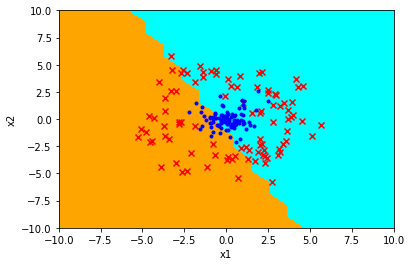

rbf
# train misclassification: 11.0 of 200
# test misclassification: 16.0 of 200


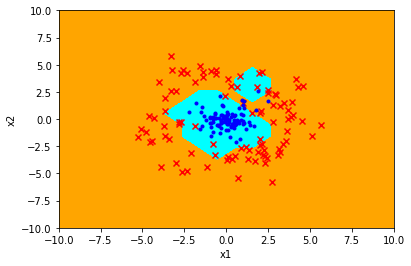

In [5]:
train_perceptron("dot", dot_kernel, 0.5)
train_perceptron("rbf", rbf_kernel, 0.5)